<a href="https://colab.research.google.com/github/sarthakpruthi/deep-learning-fastai/blob/master/fastai4NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

here we need 3 models

1.language model ie already there as Wikitext103

2.Language model

3.Classifier

In [0]:
from fastai import *
from fastai.text import *

In [2]:
paths=untar_data(URLs.IMDB_SAMPLE)
paths.ls()

[PosixPath('/root/.fastai/data/imdb_sample/texts.csv')]

In [3]:
df=pd.read_csv(paths/'texts.csv')
df.head()

,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False


In [4]:
df['text'][1]

'This is a extremely well-made film. The acting, script and camera-work are all first-rate. The music is good, too, though it is mostly early in the film, when things are still relatively cheery. There are no really superstars in the cast, though several faces will be familiar. The entire cast does an excellent job with the script.<br /><br />But it is hard to watch, because there is no good end to a situation like the one presented. It is now fashionable to blame the British for setting Hindus and Muslims against each other, and then cruelly separating them into two countries. There is some merit in this view, but it\'s also true that no one forced Hindus and Muslims in the region to mistreat each other as they did around the time of partition. It seems more likely that the British simply saw the tensions between the religions and were clever enough to exploit them to their own ends.<br /><br />The result is that there is much cruelty and inhumanity in the situation and this is very u

In [5]:
data_lm=TextLMDataBunch.from_csv(paths,'texts.csv')

In [6]:
data_lm.show_batch()

idx,text
0,"described as "" highly xxunk , "" and yet a half hours searching efforts on the web have revealed nothing but endless comments on how the early episodes were so much better than the later episodes . ( xxmaj personally , i do n't see a whole lot of difference - the scripts and themes remain largely the same throughout - but they do lose some great people along the"
1,"refuses to pay her . xxmaj when he 's off peeing , she answers his cell phone and takes a message . xxmaj she runs away with his keys . \n \n xxmaj then the story switches to the contractor , who pays a professional call on a rich , bored xxmaj new xxmaj york woman , who plays with him until he is aroused , then she pulls"
2,"think it over before making another one similar to this one . one final note haha ! ! xxup for xxup all xxup the xxup people xxup who xxup enjoy xxup watching xxup animals xxup xxunk xxup to xxup death , xxup letting xxup rot , xxup with xxup women xxup and xxup children xxup as xxup well xxup and a xxup five xxup minute xxup scene xxup of xxup"
3,"a strange xxunk like substance which sticks to the stick , if you know what i mean ! xxmaj it then xxunk up the stick & xxunk itself to the old man 's hand . xxmaj meanwhile xxmaj steve & xxmaj jane are quietly driving along xxunk their own business when the old man runs out in front of xxmaj steve 's car , xxmaj steve being a decent kinda"
4,"modern audiences ( like yours truly ) but sometimes , words can speak xxunk than actions . xxmaj mendes has delivered a fine follow - up to his xxmaj oscar - winning debut , a film which is as intelligent as it is beautiful to watch . "" xxmaj road xxmaj to xxmaj perdition "" may not be to everyone 's tastes but this is one xxup dvd i shall"


In [0]:
data_lm.save()

Tokenization

In [8]:
data_clas=TextClasDataBunch.from_csv(paths,'texts.csv')

In [9]:
data_clas.show_batch()

text,target
"xxbos xxmaj raising xxmaj victor xxmaj vargas : a xxmaj review \n \n xxmaj you know , xxmaj raising xxmaj victor xxmaj vargas is like sticking your hands into a big , steaming bowl of xxunk . xxmaj it 's warm and gooey , but you 're not sure if it feels right . xxmaj try as i might , no matter how warm and gooey xxmaj raising xxmaj",negative
"xxbos xxmaj this film sat on my xxmaj xxunk for weeks before i watched it . i xxunk a self - indulgent xxunk flick about relationships gone bad . i was wrong ; this was an xxunk xxunk into the xxunk - up xxunk of xxmaj new xxmaj yorkers . \n \n xxmaj the format is the same as xxmaj max xxmaj xxunk ' "" xxmaj la xxmaj ronde",positive
"xxbos i really wanted to love this show . i truly , honestly did . \n \n xxmaj for the first time , gay viewers get their own version of the "" xxmaj the xxmaj bachelor "" . xxmaj with the help of his obligatory "" hag "" xxmaj xxunk , xxmaj james , a good looking , well - to - do thirty - something has the chance",negative
"xxbos \n \n i 'm sure things did n't exactly go the same way in the real life of xxmaj homer xxmaj hickam as they did in the film adaptation of his book , xxmaj rocket xxmaj boys , but the movie "" xxmaj october xxmaj sky "" ( an xxunk of the book 's title ) is good enough to stand alone . i have not read xxmaj",positive
"xxbos xxmaj to review this movie , i without any doubt would have to quote that memorable scene in xxmaj tarantino 's "" xxmaj pulp xxmaj fiction "" ( xxunk ) when xxmaj jules and xxmaj vincent are talking about xxmaj mia xxmaj wallace and what she does for a living . xxmaj jules tells xxmaj vincent that the "" xxmaj only thing she did worthwhile was pilot "" .",negative


In [0]:
# xxfld: This is a special thing where if you've got like title, summary, abstract, body, (i. e. separate parts of a document),
# each one will get a separate field and so they will get numbered (e.g. xxfld 2).
# xxup: If there's something in all caps, it gets lower cased and a token called xxup will get added to it.

Numericalization

In [11]:
data_clas.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'the']

In [12]:
data_clas.train_ds[0][0]

Text xxbos i loved the first " xxmaj azumi " movie . i 've seen xxmaj ms. xxmaj ueto in a variety of her xxup tv appearances and i 've seen my fair share of samurai and ninja flicks . i have to say that this movie was much weaker than i 'd expected . 
 
  xxmaj given the movie 's cast and set up in " xxmaj azumi " , they should have been able to do a much better job with this movie , but instead it was slow , xxunk in parts , and sprinkled with very poor , unconvincing , and wooden acting . 
 
  xxmaj when they bothered to reference the first movie , they did so in a manner that was pretty loose and weak . xxmaj in " xxmaj azumi " , the title character is the best of a group of superior killers . xxmaj in " xxmaj azumi 2 " she seems somehow xxunk and less - impressive . 
 
  xxmaj that 's not to say it was a total loss . xxmaj there were a few decent fight scenes and some over - the - top characters . xxmaj unfortunately , the movie suffers overall from the simple fact that xxmaj xxunk

In [13]:
data_clas.train_ds[0][0].data[:10]

array([   2,   19,  491,    9,  107,   22,    5, 2227,   22,   27])

In [0]:
#this does both tokenization and numericalization

In [15]:
#  data=(TextList.from_csv(path,'texts.csv',col='text')
#                          .split_from_df(col=2)
#                          .label_from_df(cols=0)
#                          .databunch())
#this generates error
 data_lm = (TextList.from_csv(paths, 'texts.csv', cols='text')
           #Where are the text? Column 'text' of texts.csv
           .split_by_rand_pct()
           #How to split it? Randomly with the default 20% in valid
           .label_for_lm()
           #Label it for a language model
           .databunch())
           #Finally we convert to a DataBunch

In [16]:
path=untar_data(URLs.IMDB)
path.ls()

[PosixPath('/root/.fastai/data/imdb/tmp_clas'),
 PosixPath('/root/.fastai/data/imdb/tmp_lm'),
 PosixPath('/root/.fastai/data/imdb/train'),
 PosixPath('/root/.fastai/data/imdb/README'),
 PosixPath('/root/.fastai/data/imdb/imdb.vocab'),
 PosixPath('/root/.fastai/data/imdb/test'),
 PosixPath('/root/.fastai/data/imdb/unsup')]

In [17]:
(path/'train').ls()

[PosixPath('/root/.fastai/data/imdb/train/unsupBow.feat'),
 PosixPath('/root/.fastai/data/imdb/train/labeledBow.feat'),
 PosixPath('/root/.fastai/data/imdb/train/neg'),
 PosixPath('/root/.fastai/data/imdb/train/pos')]

In [18]:
data_lm=(TextList.from_folder(path)
                  .filter_by_folder(include=['train','test'])
                  .split_by_rand_pct(0.1)
                  .label_for_lm()#predicts next word from previous word
                  .databunch())

In [0]:
data_lm.save('tm_lm')

In [20]:
data_lm.show_batch()

idx,text
0,"and you ca n't help wondering why a group of highly organized terrorists ( who later become pretty clueless ) fall for it . xxmaj the film starts with a pretty powerful scene but then meanders for quite a long time building up towards the great finale . xxmaj overall , i think xxmaj who dares wins could have been an interesting 45 minutes episode of xxmaj the xxmaj professionals"
1,so much time to set up xxup that punchline ( example : the students ' awards gag ) . xxmaj and nearly all are directed without any artistry . xxmaj do n't get me wrong : about 1 every 10 jokes actually manages to be funny ( the iron / phone one is probably my favorite ) . xxmaj there is also some wonderful full - frontal nudity that proves
2,", and the radical religious nuts do n't need anymore funding . xxbos i gave this movie a very fair chance , and it betrayed me . xxmaj this is very little more than a black and white excuse to bore the hell out of the audience even as the egotist xxmaj xxunk ( who did way better with xxup targets ) gets "" great performances "" out of a"
3,"do well , and xxmaj brennan is always a thrill . xxmaj in fact , xxmaj mature may be the only acting downside of this flick . xxmaj still , it is the weakest of the old xxup ok xxmaj corral movies . xxbos xxmaj the main aspect about the xxmaj superstar 's movies at his later stages were the frequency , the xxunk between one movie and the next"
4,"lack of inspiration is likely to make the viewer laugh at the supposed "" scares "" on the screen . xxmaj the make - up effects of the "" ghosts "" were n't too bad given the low budget but their actions just defied logic . i was scratching my head quite a few times during this movie . \n \n i could n't give away the ending even"


In [21]:
#not working
#learn = language_model_learner(data_lm,arch=AWD_LSTM, drop_mult=0.3)
#learn = language_model_learner(data_lm, pretrained_model=URLs.WT103_FWD, drop_mult=0.3)
learn = language_model_learner(data_lm, AWD_LSTM)
#language model is a model that learns to predict what would be next word of a sentence

In [22]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


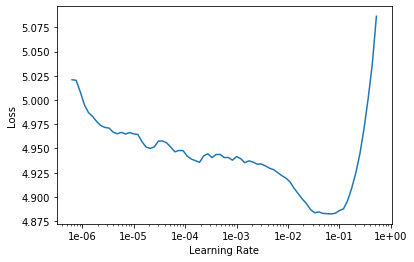

In [23]:
learn.recorder.plot(skip_end=15)

In [24]:
learn.fit_one_cycle(1,slice(4e-3,1e-2),moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.399446,4.052506,0.288603,09:53


In [0]:
learn.save('fit_head')

In [26]:
learn.load('fit_head')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (45000 items)
x: LMTextList
xxbos xxmaj this is actually a pretty bad film . xxmaj the ideology is not as perverse as in those films xxmaj collins made later . xxmaj however , my main misgivings about the film are that it is implausible and quite frankly boring for a long time . xxmaj the whole concept of an ex - xxup sas man joining terrorists for no particular reason is n't very convincing and you ca n't help wondering why a group of highly organized terrorists ( who later become pretty clueless ) fall for it . xxmaj the film starts with a pretty powerful scene but then meanders for quite a long time building up towards the great finale . xxmaj overall , i think xxmaj who dares wins could have been an interesting 45 minutes episode of xxmaj the xxmaj professionals but the story does n't carry a feature film . xxmaj although reasonably successful at the time this film initiated the demise of xxmaj collins ' career who in the eigh

In [0]:
learn.unfreeze()

In [28]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


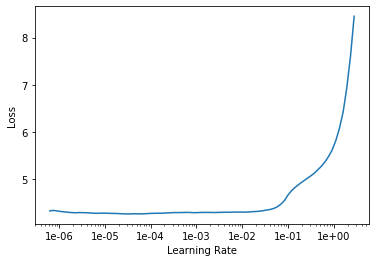

In [29]:
learn.recorder.plot()

In [30]:
learn.fit_one_cycle(1,slice(1e-5,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,4.221441,3.988265,0.294541,11:21


In [0]:
learn.save('fine_tuned')

In [32]:
learn.load('fine_tuned')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (45000 items)
x: LMTextList
xxbos xxmaj this is actually a pretty bad film . xxmaj the ideology is not as perverse as in those films xxmaj collins made later . xxmaj however , my main misgivings about the film are that it is implausible and quite frankly boring for a long time . xxmaj the whole concept of an ex - xxup sas man joining terrorists for no particular reason is n't very convincing and you ca n't help wondering why a group of highly organized terrorists ( who later become pretty clueless ) fall for it . xxmaj the film starts with a pretty powerful scene but then meanders for quite a long time building up towards the great finale . xxmaj overall , i think xxmaj who dares wins could have been an interesting 45 minutes episode of xxmaj the xxmaj professionals but the story does n't carry a feature film . xxmaj although reasonably successful at the time this film initiated the demise of xxmaj collins ' career who in the eigh

In [33]:
learn.predict('I liked this movie because ', 100, temperature=1.1,min_p=0.001)

'I liked this movie because  i was watching it on the screen , i was there and i \'m the only reviewer here who like that , i thought the worst movie i \'ve seen is a " Black Chick " show about a little black guy whose house was pretty much her mind and were all so sad . There \'s OK about WHAT he does , but some better comedies of course OK . i feel the script was GOOD , and i do n\'t understand what . Even a few of those are funny'

In [0]:
learn.save_encoder('fine_tuned_enc')#the second part is about predicting next part,but we want it to understand which is encoder

In [0]:
#now here our language model is ready

Classifier

In [36]:
data_clas=(TextList.from_folder(path,vocab=data_lm.vocab)
                       .split_by_folder(valid='test')
                       .label_from_folder(classes=['neg','pos'])
                       .databunch(bs=50))
data_clas.save('tm_clas')

In [37]:
#data_clas=TextClasDataBunch.load(path,'tmp_clas',bs=50)
data_clas.show_batch()

text,target
xxbos xxmaj match 1 : xxmaj tag xxmaj team xxmaj table xxmaj match xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley vs xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley started things off with a xxmaj tag xxmaj team xxmaj table xxmaj match against xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit . xxmaj according to the rules,pos
"xxbos * ! ! - xxup spoilers - ! ! * \n \n xxmaj before i begin this , let me say that i have had both the advantages of seeing this movie on the big screen and of having seen the "" xxmaj authorized xxmaj version "" of this movie , remade by xxmaj stephen xxmaj king , himself , in 1997 . \n \n xxmaj both",pos
"xxbos xxmaj okay , so i 'm not a big video game buff , but was the game xxmaj house of the xxmaj dead really famous enough to make a movie from ? xxmaj sure , they went as far as to actually put in quick video game clips throughout the movie , as though justifying any particular scene of violence , but there are dozens and dozens of games",neg
"xxbos xxmaj god ! xxmaj zorro has been the the subject of about as many movies as xxmaj tarzan , and probably had about as many actors in the title role . \n \n xxmaj this xxmaj serial is one of my own personal favourites , and as previously stated , it is one of the xxmaj top 5 xxmaj sound xxmaj serials . xxmaj oddly enough , this",pos
"xxbos xxmaj on xxmaj sunday xxmaj july 27 , 1997 , the first episode of a new science fiction series called "" xxmaj stargate xxup sg-1 "" was broadcast on xxmaj showtime . a spin - off of and sequel to the 1994 film "" xxmaj stargate "" starring xxmaj kurt xxmaj russell and xxmaj james xxmaj spader , the series begins approximately one year after the events portrayed in",pos


In [0]:
#increase drop_mult if we are overfitting and decrease if we are underfitting
learn=text_classifier_learner(data_clas,AWD_LSTM,drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


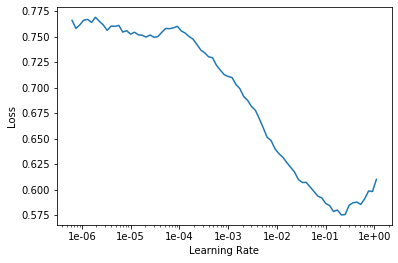

In [39]:
learn.lr_find()
learn.recorder.plot()

In [40]:
learn.fit_one_cycle(1,slice(1e-3,1e-2),moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.369552,0.303825,0.874120,02:48


In [0]:
learn.save('first')

In [42]:
learn.load('first')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (25000 items)
x: TextList
xxbos xxmaj this is actually a pretty bad film . xxmaj the ideology is not as perverse as in those films xxmaj collins made later . xxmaj however , my main misgivings about the film are that it is implausible and quite frankly boring for a long time . xxmaj the whole concept of an ex - xxup sas man joining terrorists for no particular reason is n't very convincing and you ca n't help wondering why a group of highly organized terrorists ( who later become pretty clueless ) fall for it . xxmaj the film starts with a pretty powerful scene but then meanders for quite a long time building up towards the great finale . xxmaj overall , i think xxmaj who dares wins could have been an interesting 45 minutes episode of xxmaj the xxmaj professionals but the story does n't carry a feature film . xxmaj although reasonably successful at the time this film initiated the demise of xxmaj collins ' career who in the eighties 

In [43]:
learn.freeze_to(-2)#this means unfreeze last 2 layers
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.345215,0.274310,0.887000,03:09


In [44]:
learn.save('second')
learn.load('second')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (25000 items)
x: TextList
xxbos xxmaj this is actually a pretty bad film . xxmaj the ideology is not as perverse as in those films xxmaj collins made later . xxmaj however , my main misgivings about the film are that it is implausible and quite frankly boring for a long time . xxmaj the whole concept of an ex - xxup sas man joining terrorists for no particular reason is n't very convincing and you ca n't help wondering why a group of highly organized terrorists ( who later become pretty clueless ) fall for it . xxmaj the film starts with a pretty powerful scene but then meanders for quite a long time building up towards the great finale . xxmaj overall , i think xxmaj who dares wins could have been an interesting 45 minutes episode of xxmaj the xxmaj professionals but the story does n't carry a feature film . xxmaj although reasonably successful at the time this film initiated the demise of xxmaj collins ' career who in the eighties 

In [45]:
learn.freeze_to(-3)
learn.fit_one_cycle(1,moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.260536,0.226813,0.909960,04:12


In [46]:
learn.save('third')
learn.load('third')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (25000 items)
x: TextList
xxbos xxmaj this is actually a pretty bad film . xxmaj the ideology is not as perverse as in those films xxmaj collins made later . xxmaj however , my main misgivings about the film are that it is implausible and quite frankly boring for a long time . xxmaj the whole concept of an ex - xxup sas man joining terrorists for no particular reason is n't very convincing and you ca n't help wondering why a group of highly organized terrorists ( who later become pretty clueless ) fall for it . xxmaj the film starts with a pretty powerful scene but then meanders for quite a long time building up towards the great finale . xxmaj overall , i think xxmaj who dares wins could have been an interesting 45 minutes episode of xxmaj the xxmaj professionals but the story does n't carry a feature film . xxmaj although reasonably successful at the time this film initiated the demise of xxmaj collins ' career who in the eighties 

In [47]:
learn.predict('I really loved that movie, it was awesome!')

(Category pos, tensor(1), tensor([7.3085e-04, 9.9927e-01]))

In [0]:
learn.export('sentiment-export.pkl')

In [53]:
from google.colab import files

files.download(path/'sentiment-export.pkl')

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 55010, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 320, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 351, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 364, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 724, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil